In [0]:
!pip install tensorflow==2.0.0

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
%cd 'gdrive/My Drive/machine learning'

[Errno 2] No such file or directory: 'gdrive/My Drive/machine learning'
/content/gdrive/My Drive/machine learning/breast cancer


In [0]:
!ls

'Breast Cancer DataSet.ipynb'   Radom_Forest_Classification.ipynb
 breast_cancer_logistic.ipynb   Untitled0.ipynb
 breast_cancer_women.csv


In [0]:
%cd breast cancer

[Errno 2] No such file or directory: 'breast cancer'
/content/gdrive/My Drive/machine learning/breast cancer


# New Section

In [0]:
!ls

'Breast Cancer DataSet.ipynb'   Radom_Forest_Classification.ipynb
 breast_cancer_logistic.ipynb   Untitled0.ipynb
 breast_cancer_women.csv


In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM,SimpleRNN
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
data = pd.read_csv('breast_cancer_women.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [10]:
data['result'] = list(map(lambda x: 1 if x == "M" else 0,data['diagnosis']))

In [11]:
data['result'].unique()

array([1, 0], dtype=int64)

In [13]:
data['result']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: result, Length: 569, dtype: int64

In [14]:
data.drop(['id','diagnosis','Unnamed: 32'],inplace = True, axis = 1)
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,result
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [15]:
from collections import Counter
Counter(data['result'])

Counter({1: 212, 0: 357})

In [27]:
Y = data['result'].values
X = data.drop(['result'],axis=1).values

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=66)

In [29]:
x_train = X_train.reshape(X_train.shape[0],1,X_train.shape[1])
x_test = X_test.reshape(X_test.shape[0],1,X_test.shape[1])
x_train.shape,x_test.shape

((426, 1, 30), (143, 1, 30))

LSTM

In [30]:
model = Sequential()
model.add(LSTM(200,input_shape=(1,30),activation='relu',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

In [31]:
lr = 1e-3

In [32]:
opt = tf.keras.optimizers.Adam(lr=lr, decay=1e-5)

In [33]:
model.compile(loss='binary_crossentropy', optimizer=opt,
             metrics=['accuracy'])

In [35]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Train on 426 samples, validate on 143 samples
Epoch 1/5
426/426 [==============================] - 10s 24ms/sample - loss: 3.4136 - accuracy: 0.5282 - val_loss: 1.7756 - val_accuracy: 0.3566
Epoch 2/5
426/426 [==============================] - 1s 1ms/sample - loss: 1.0599 - accuracy: 0.7160 - val_loss: 0.3968 - val_accuracy: 0.9021
Epoch 3/5
426/426 [==============================] - 1s 1ms/sample - loss: 0.7332 - accuracy: 0.7723 - val_loss: 0.5110 - val_accuracy: 0.8182
Epoch 4/5
426/426 [==============================] - 0s 1ms/sample - loss: 0.6537 - accuracy: 0.8310 - val_loss: 0.4357 - val_accuracy: 0.9091
Epoch 5/5
426/426 [==============================] - 0s 1ms/sample - loss: 0.7522 - accuracy: 0.7629 - val_loss: 0.4716 - val_accuracy: 0.8881


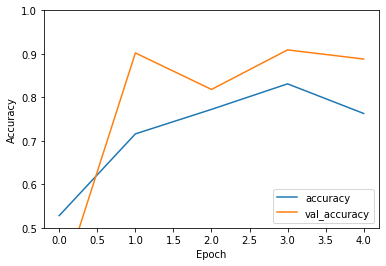

In [36]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

ANN

In [37]:
X_train.shape

(426, 30)

In [42]:
model = Sequential()
model.add(Dense(128,input_dim=30,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [43]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [44]:
history = model.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Train on 426 samples, validate on 143 samples
Epoch 1/5
426/426 [==============================] - 1s 3ms/sample - loss: 12.0957 - accuracy: 0.4319 - val_loss: 4.1672 - val_accuracy: 0.7273
Epoch 2/5
426/426 [==============================] - 0s 370us/sample - loss: 1.7017 - accuracy: 0.7817 - val_loss: 0.7255 - val_accuracy: 0.8881
Epoch 3/5
426/426 [==============================] - 0s 615us/sample - loss: 0.5784 - accuracy: 0.8897 - val_loss: 0.4553 - val_accuracy: 0.9091
Epoch 4/5
426/426 [==============================] - 0s 595us/sample - loss: 0.7634 - accuracy: 0.8756 - val_loss: 1.6735 - val_accuracy: 0.8462
Epoch 5/5
426/426 [==============================] - 0s 579us/sample - loss: 0.6579 - accuracy: 0.8897 - val_loss: 0.5783 - val_accuracy: 0.8322


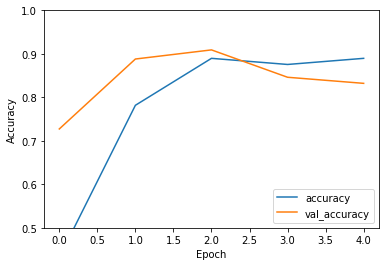

In [45]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

RNN

In [46]:
model_rnn = Sequential()
model_rnn.add(SimpleRNN(200,input_shape=(1,30),activation='relu'))
model_rnn.add(Dropout(0.3))

model_rnn.add(Dense(32, activation='relu'))
model_rnn.add(Dropout(0.2))

model_rnn.add(Dense(1, activation='sigmoid'))

In [47]:
model_rnn.compile(optimizer=keras.optimizers.Adam(learning_rate=lr),loss='binary_crossentropy',metrics=['accuracy'])

In [49]:
history = model_rnn.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Train on 426 samples, validate on 143 samples
Epoch 1/5
426/426 [==============================] - 3s 7ms/sample - loss: 37.0082 - accuracy: 0.4225 - val_loss: 1.5260 - val_accuracy: 0.7692
Epoch 2/5
426/426 [==============================] - 0s 773us/sample - loss: 15.8372 - accuracy: 0.6221 - val_loss: 2.3604 - val_accuracy: 0.6434
Epoch 3/5
426/426 [==============================] - 0s 747us/sample - loss: 13.1819 - accuracy: 0.5845 - val_loss: 0.6992 - val_accuracy: 0.8951
Epoch 4/5
426/426 [==============================] - 0s 763us/sample - loss: 7.3540 - accuracy: 0.6009 - val_loss: 0.4433 - val_accuracy: 0.8811
Epoch 5/5
426/426 [==============================] - 0s 779us/sample - loss: 4.9973 - accuracy: 0.6338 - val_loss: 0.3099 - val_accuracy: 0.8811


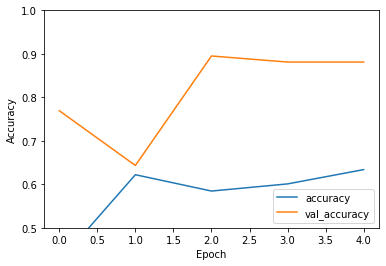

In [50]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')